In [1]:
#♣Clustering Kmeans

In [2]:
import pandas as pd

data = pd.read_csv("C:/Users/HHemery_stg/Downloads/heart_disease.csv")

df = pd.DataFrame(data)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [3]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [4]:
num_cols=df.select_dtypes(include='number') #Séparation colonnes numériques et catégoriques

num_cols.head()

,id,age,trestbps,chol,thalch,oldpeak,ca
0,0,63,145.0,233.0,150.0,2.3,0.0
1,1,67,160.0,286.0,108.0,1.5,3.0
2,2,67,120.0,229.0,129.0,2.6,2.0
3,3,37,130.0,250.0,187.0,3.5,0.0
4,4,41,130.0,204.0,172.0,1.4,0.0


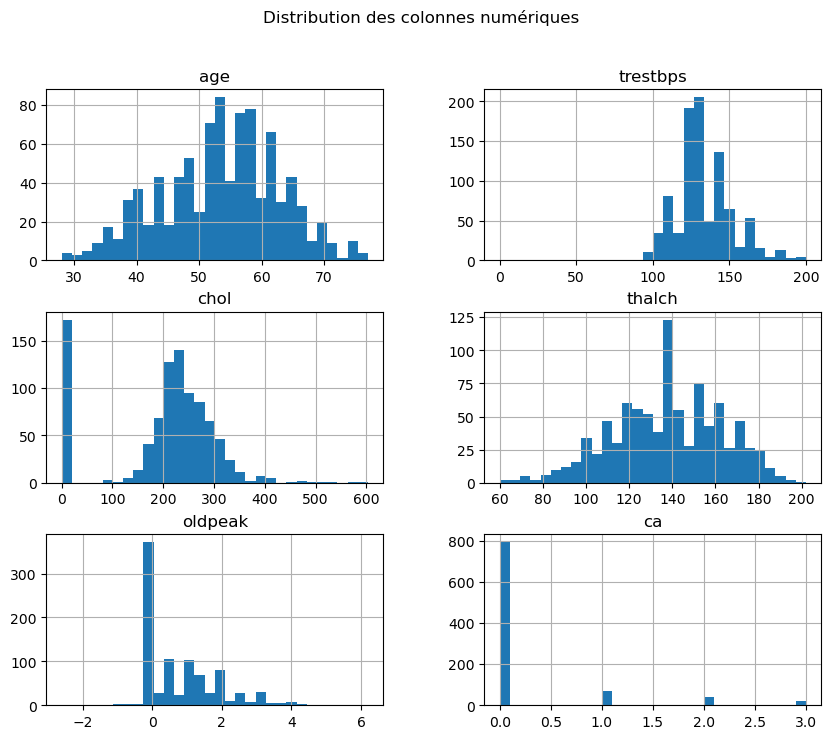

In [5]:
import matplotlib.pyplot as plt

num_cols1=num_cols.drop(["id"],axis=1)

num_cols_propre=num_cols1.fillna(num_cols.median())

num_cols_propre.hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribution des colonnes numériques')
plt.show()

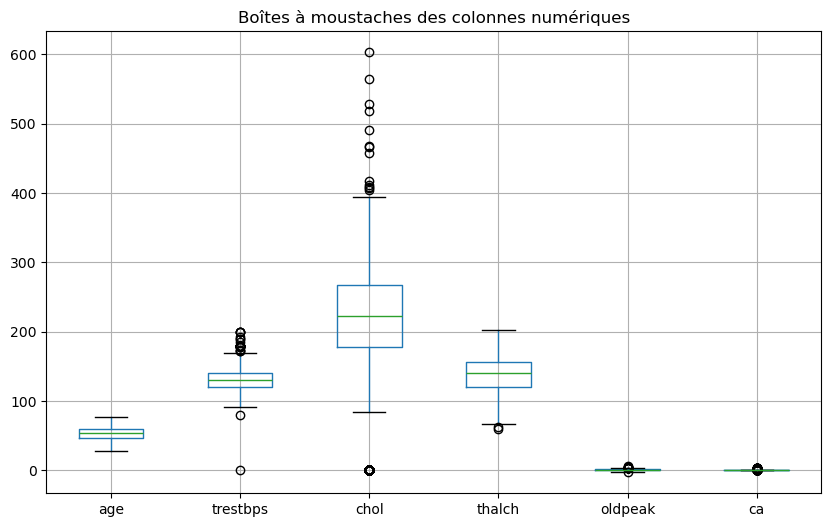

In [6]:
num_cols_propre.boxplot(figsize=(10, 6))
plt.title('Boîtes à moustaches des colonnes numériques')
plt.show()

In [7]:
cat_cols=df.select_dtypes(include='object')

cat_cols.head()

,sex,dataset,cp,fbs,restecg,exang,slope,thal
0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal


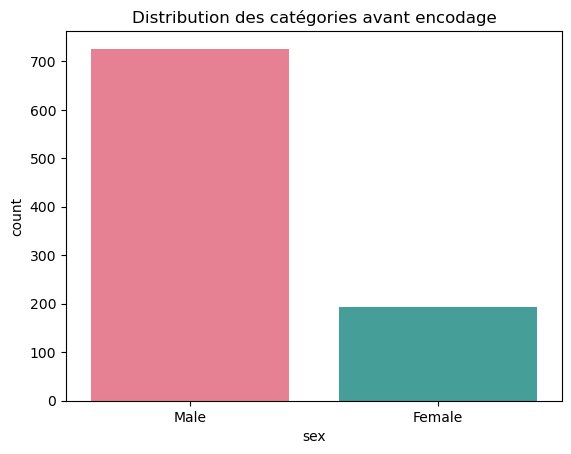

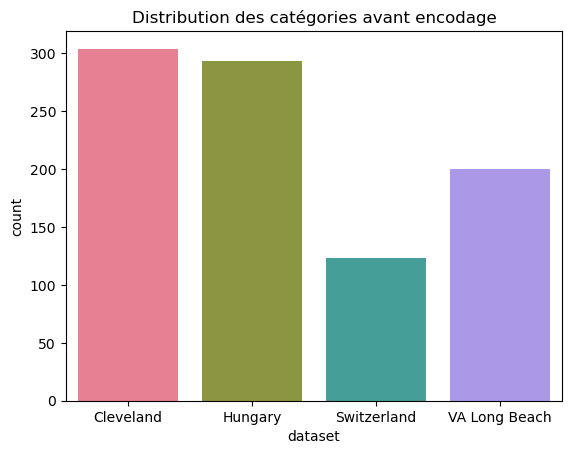

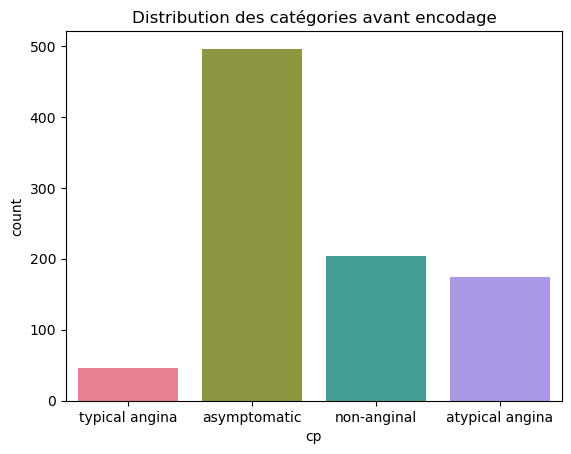

C:\Users\HHemery_stg\AppData\Local\Temp\ipykernel_18688\2853944603.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=i, data=cat_cols_propre, palette=palette, legend=False, hue=i)


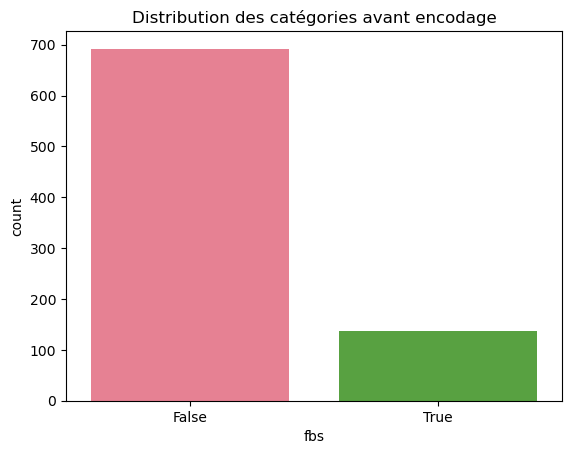

C:\Users\HHemery_stg\AppData\Local\Temp\ipykernel_18688\2853944603.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=i, data=cat_cols_propre, palette=palette, legend=False, hue=i)


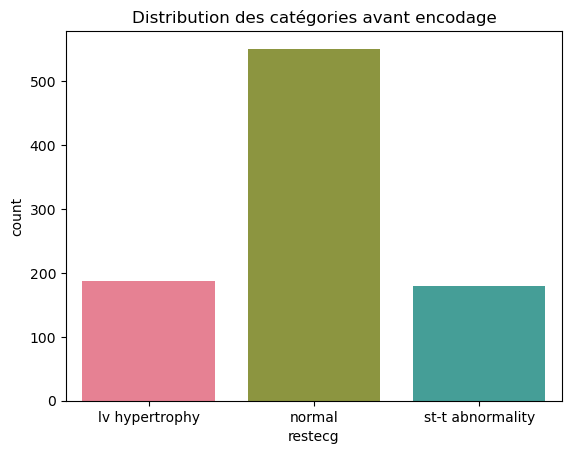

C:\Users\HHemery_stg\AppData\Local\Temp\ipykernel_18688\2853944603.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=i, data=cat_cols_propre, palette=palette, legend=False, hue=i)


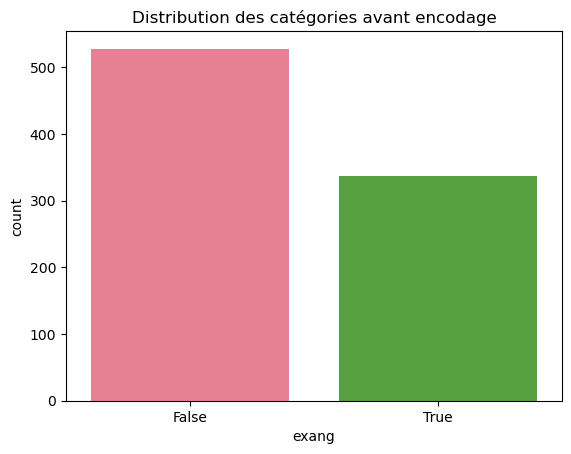

C:\Users\HHemery_stg\AppData\Local\Temp\ipykernel_18688\2853944603.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=i, data=cat_cols_propre, palette=palette, legend=False, hue=i)


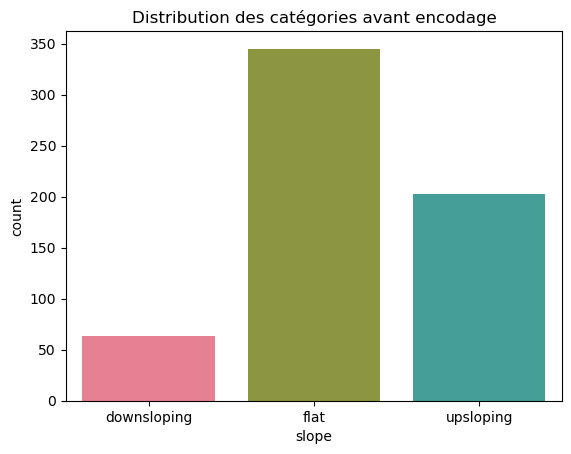

C:\Users\HHemery_stg\AppData\Local\Temp\ipykernel_18688\2853944603.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=i, data=cat_cols_propre, palette=palette, legend=False, hue=i)


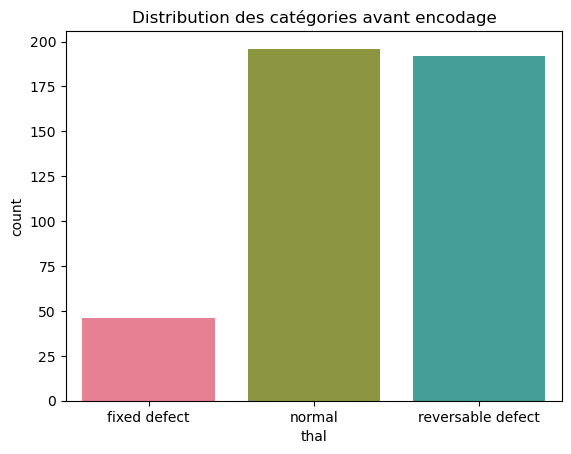

In [34]:
import seaborn as sns

cat_cols_propre=cat_cols.fillna(cat_cols.mode())

for i in cat_cols_propre:
    unique_values = cat_cols_propre[i].unique()
    n_colors = len(unique_values)
    palette = sns.color_palette("husl", n_colors=n_colors)
    sns.countplot(x=i, data=cat_cols_propre, palette=palette, legend=False, hue=i)
    plt.title('Distribution des catégories avant encodage')
    plt.show()

In [9]:
#Standardisation données numériques

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_cols_propre)
vs=scaler.transform(num_cols_propre)
num_cols_st = pd.DataFrame(vs, columns=num_cols_propre.columns)

num_cols_st.head()

,age,trestbps,chol,thalch,oldpeak,ca
0,1.007386,0.705176,0.303643,0.489727,1.368109,-0.361400
1,1.432034,1.518569,0.789967,-1.181478,0.611589,4.411152
2,1.432034,-0.650479,0.266939,-0.345875,1.651804,2.820301
3,-1.752828,-0.108217,0.459634,1.961979,2.502889,-0.361400
4,-1.328180,-0.108217,0.037541,1.365120,0.517024,-0.361400


In [10]:
#Encodage des données catégoriques

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

encoder_result = encoder.fit_transform(cat_cols_propre).toarray()

print(encoder_result)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]]


In [11]:
df_encoder=pd.DataFrame(encoder_result,columns=encoder.get_feature_names_out(cat_cols_propre.columns))

df_encoder.head()

,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,...,exang_True,exang_nan,slope_downsloping,slope_flat,slope_upsloping,slope_nan,thal_fixed defect,thal_normal,thal_reversable defect,thal_nan
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df_final=pd.concat([num_cols_st.reset_index(drop=True), df_encoder], axis=1)

df_final.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,exang_True,exang_nan,slope_downsloping,slope_flat,slope_upsloping,slope_nan,thal_fixed defect,thal_normal,thal_reversable defect,thal_nan
0,1.007386,0.705176,0.303643,0.489727,1.368109,-0.361400,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.432034,1.518569,0.789967,-1.181478,0.611589,4.411152,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.432034,-0.650479,0.266939,-0.345875,1.651804,2.820301,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.752828,-0.108217,0.459634,1.961979,2.502889,-0.361400,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.328180,-0.108217,0.037541,1.365120,0.517024,-0.361400,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
#model

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans= KMeans(n_clusters=3, random_state=42) #test avec 3 clusters

kmeans.fit(df_final)

clusters = kmeans.predict(df_final)

score_silhouette = silhouette_score(df_final, clusters)
print("Score de silhouette :", score_silhouette)

Score de silhouette : 0.14895209513126603


C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\clust

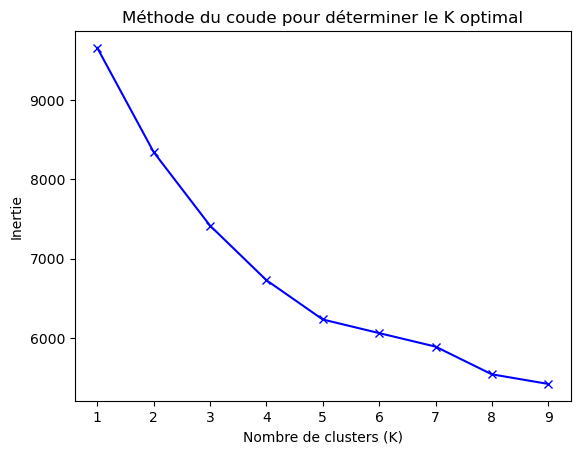

In [14]:
#méthode Elbow pour trouver le nombre de cluster k

inertie = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    inertie.append(kmeans.inertia_)

# Tracer la courbe
plt.plot(K_range, inertie, 'bx-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le K optimal')
plt.show()

In [15]:
#test avec 5 clusters

kmeans= KMeans(n_clusters=5, random_state=42)

kmeans.fit(df_final)

clusters = kmeans.predict(df_final)

score_silhouette = silhouette_score(df_final, clusters)
print("Score de silhouette :", score_silhouette)

Score de silhouette : 0.14803192109936475


C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [16]:
#Réduction de dimension pour analyser les clusters visuellement

from sklearn.decomposition import PCA

pca = PCA()

df_pca = pca.fit_transform(df_final)

print(pca.explained_variance_ratio_*100)

[1.95546930e+01 1.53784026e+01 1.05150076e+01 8.84445662e+00
 7.41869232e+00 6.07507680e+00 4.62069656e+00 3.85215989e+00
 3.04022335e+00 2.70929466e+00 2.46887379e+00 2.24469912e+00
 2.18018136e+00 1.73903045e+00 1.66650772e+00 1.47977063e+00
 1.35708816e+00 1.04402193e+00 8.41461416e-01 6.80311064e-01
 5.75596094e-01 5.60616902e-01 4.63682550e-01 4.06274851e-01
 2.56325900e-01 2.68547013e-02 3.85648320e-30 3.13177669e-31
 1.98299664e-31 1.13154745e-31 1.08570244e-31 1.00984409e-31
 1.00984409e-31 5.81121119e-32]


In [17]:
#On prend les 2 premières PC pour un espace 2D, on garde 3 clusters car le score est meilleur

test_pca=PCA(n_components=2)

df_test_pca=test_pca.fit_transform(df_final)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_test_pca)

score_silhouette = silhouette_score(df_test_pca, clusters)
print("Score de silhouette :", score_silhouette)

C:\Users\HHemery_stg\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Score de silhouette : 0.4152393900260943


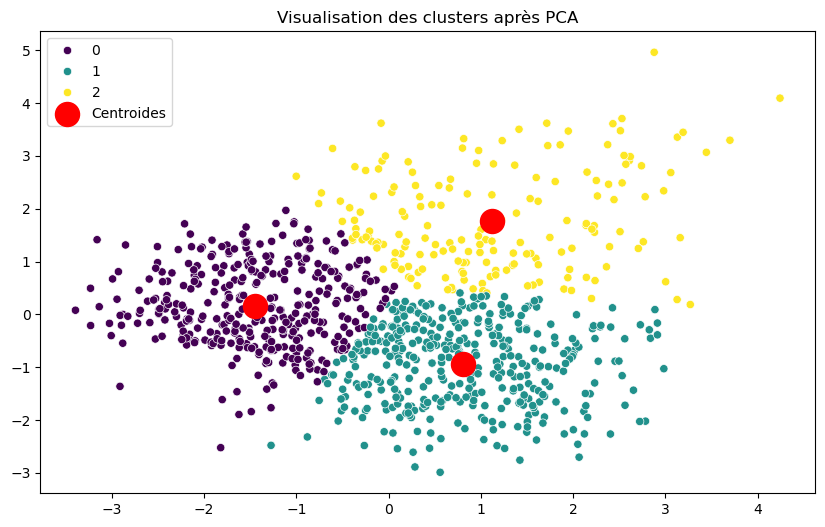

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_test_pca[:, 0], y=df_test_pca[:, 1], hue=clusters, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.legend()
plt.title('Visualisation des clusters après PCA')
plt.show()